Part 1

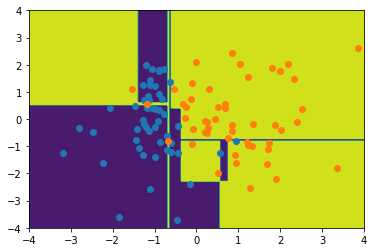

In [ ]:
from sklearn import datasets
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

np.random.seed(0)

X, y = datasets.make_classification(n_samples=100, n_features=2,                                    
				n_informative=2, n_redundant=0)


clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, y)

Xgrid,x1line,x2line = gen_sample_grid(200,200,4)
pred = clf.predict(Xgrid).reshape(200,200)

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,pred)
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

Part 2

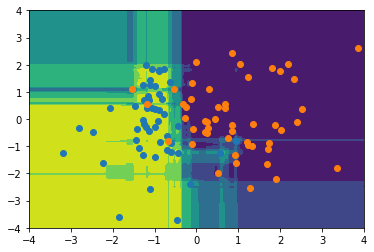

In [ ]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators=100,max_depth=20)
rf.fit(X,y)

prob = rf.predict_proba(Xgrid)
prob_plot = prob[:,0].reshape(200,200)

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,prob_plot)
ax.scatter(X[y == 0, 0], X[y == 0, 1])
ax.scatter(X[y == 1, 0], X[y == 1, 1])

Part 3

In [ ]:
#upload image
from google.colab import files

print('Upload window.png here')
uploaded = files.upload()

Upload window.png here


Saving window.png to window.png


(-0.5, 499.5, 374.5, -0.5)

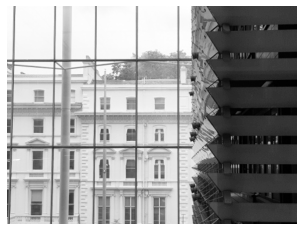

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

#load in the image
img = mpimg.imread('window.png')

#just extract one channel - technically this is red, but 
#it doesn't matter since they are all equal
imgBw = np.squeeze(img[:, :, 0])

#get the size
npy, npx = imgBw.shape

plt.figure() 
plt.imshow(imgBw, cmap=plt.cm.gray) 
plt.axis('off')

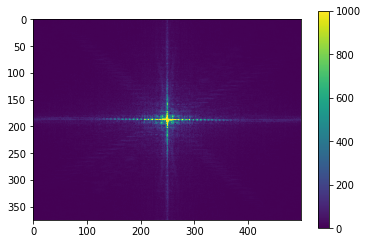

In [ ]:
fim = np.fft.fft2(imgBw)

plt.figure() 
plt.imshow(np.fft.fftshift(np.abs(fim)))
#show the colour scale:
plt.colorbar()
#set the colour limits to something so we can see the image better
plt.clim(0, 1e3) 


(-0.5, 499.5, 374.5, -0.5)

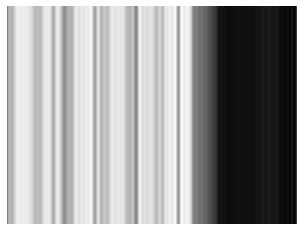

In [ ]:
#make a separate copy of the image to work on:
fim2 = fim.copy() 
#set everything in all except the first row to zero
fim2[1:npy, :] = 0 
#set everything in the first row to zero except the first 61 points and the last 60
fim2[0, 61:npx - 60] = 0

img2 = np.real(np.fft.ifft2(fim2))
plt.figure() 
plt.imshow(img2, cmap=plt.cm.gray) 
plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

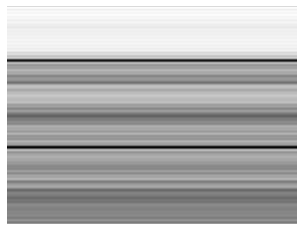

In [ ]:
#make a separate copy of the image to work on:
fim3 = fim.copy() 
#set everything in all except the first row to zero
fim3[:, 1:npx] = 0 
#set everything in the first row to zero except the first 61 points and the last 60
fim3[61:npy - 60, 0] = 0

img3 = np.real(np.fft.ifft2(fim3))
plt.figure() 
plt.imshow(img3, cmap=plt.cm.gray) 
plt.axis('off')

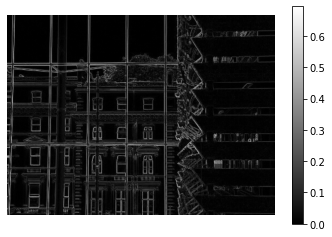

In [ ]:
diffx = np.diff(imgBw, axis=1) 
diffy = np.diff(imgBw, axis=0)

diffx = diffx[0:npy - 1,:]
diffy = diffy[:,0:npx - 1]

edgeIm = np.sqrt(np.power(diffx,2)+np.power(diffy,2))

plt.figure() 
plt.imshow(edgeIm, cmap=plt.cm.gray) 
plt.axis('off')
plt.colorbar()

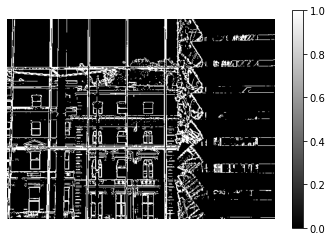

In [ ]:
t = 0.1
edgeThresh = (edgeIm > t).astype('int')

plt.figure() 
plt.imshow(edgeThresh, cmap=plt.cm.gray) 
plt.axis('off')
plt.colorbar()